# Importing Library

In [ ]:
import tweepy
import pandas as pd
import configparser

## **Fetching Tweets From Twitter API**

In [ ]:
config = configparser.ConfigParser()
config.read('/content/config.ini')

api_key = config['twitter']['API_Key']
api_key_secret = config['twitter']['API_Key_Secret']
access_token = config['twitter']['Access_Token']
access_token_secret = config['twitter']['Access_Token_Secret']

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
tweets = []

for i in tweepy.Cursor(api.search, q = '#bjp -filter:retweets',lang = 'en', tweet_mode = 'extended').items(2000):
  tweets.append(i.full_text)

In [ ]:
bjp = pd.DataFrame({'BJP':tweets})
bjp.shape

In [ ]:
bjp.to_csv('bjp.csv')
congress.to_csv('congress.csv')

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

tweets2 = []

for i in tweepy.Cursor(api.search, q = '#congress-filter:retweets',lang = 'en', tweet_mode = 'extended').items(2000):
  tweets2.append(i.full_text)

In [ ]:
congress = pd.DataFrame({'congress':tweets2})
congress.shape

In [ ]:
bjp = pd.read_csv('/content/bjp.csv')
congress = pd.read_csv('/content/congress.csv')

## **Data Pre-Proccessing**

In [ ]:
import re

def remove(text):
  text = re.sub(r'http\S+', '',text)
  text = re.sub(r'RT', '',text)
  text = re.sub(r'@', '',text)
  text = re.sub(r'#', '',text)

  return text

In [ ]:
bjp['BJP'] = bjp['BJP'].apply(remove)
congress['congress'] = congress['congress'].apply(remove)

In [ ]:
bjp.head()

,BJP
0,Whether MumbaiPolice CMOMaharashtra is taking ...
1,"ANI Sonia Gandhi has aged gracefully, while th..."
2,BJP4Karnataka High Command please wakeup from ...
3,"With the appointment of Mr. Bhatt, a brahmin l..."
4,"Komatireddy Rajagopal Reddy, a rebel Congress ..."


In [ ]:
congress.head()

,congress
0,Close fight here on my poll between SmritiIran...
1,Popular Front program inaugurated by Congress ...
2,"Komatireddy Rajagopal Reddy, a rebel Congress ..."
3,Congress leader sachin_inc hits out at Governo...
4,Knowing 👀\n\n\n\nMobile Users for blazing fa...


In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
            
    return " ".join(y)

In [ ]:
bjp['BJP'] = bjp['BJP'].apply(transform_text)
congress['congress'] = congress['congress'].apply(transform_text)

In [ ]:
bjp.head()

,BJP
0,whether mumbaipolice cmomaharashtra taking act...
1,ani sonia gandhi aged gracefully lady ended mu...
2,bjp4karnataka high command please wakeup slumb...
3,appointment bhatt brahmin leader garwhal regio...
4,komatireddy rajagopal reddy rebel congress mla...


In [ ]:
congress.head()

,congress
0,close fight poll smritiirani yogiadityanath hu...
1,popular front program inaugurated congress lea...
2,komatireddy rajagopal reddy rebel congress mla...
3,congress leader hits governor bskoshyari says ...
4,knowing mobile users blazing fast advertising ...


## **Most Used words**

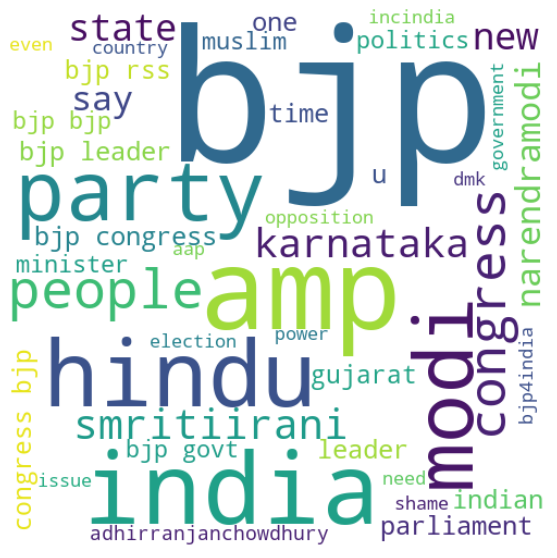

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

spam_wc = wc.generate(' '.join([twts for twts in bjp['BJP']]))


plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc, interpolation= 'bilinear')

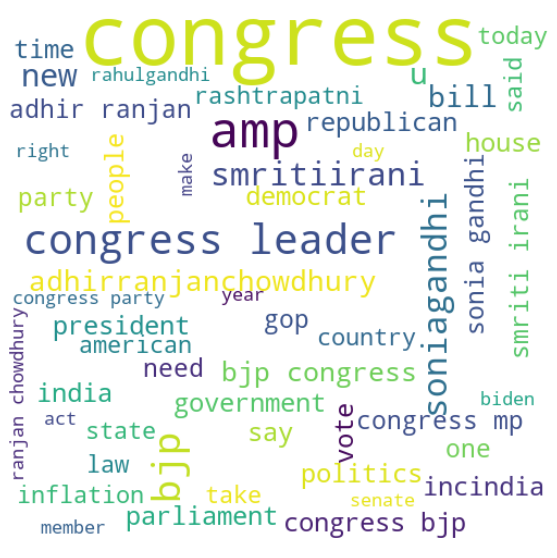

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

spam_wc = wc.generate(' '.join([twts for twts in congress['congress']]))


plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc, interpolation= 'bilinear')

## **Sentiment analysis**

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()


In [ ]:
bjp['score'] = bjp['BJP'].apply(lambda review: vader.polarity_scores(review))
bjp['compound']  = bjp['score'].apply(lambda score_dict: score_dict['compound'])
bjp['Sentiment'] = bjp['compound'].apply(lambda c: 1 if c >=0 else 0)
bjp.head()

,BJP,score,compound,Sentiment
0,whether mumbaipolice cmomaharashtra taking act...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,ani sonia gandhi aged gracefully lady ended mu...,"{'neg': 0.122, 'neu': 0.594, 'pos': 0.284, 'co...",0.5994,1
2,bjp4karnataka high command please wakeup slumb...,"{'neg': 0.138, 'neu': 0.632, 'pos': 0.23, 'com...",0.4939,1
3,appointment bhatt brahmin leader garwhal regio...,"{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.1280,0
4,komatireddy rajagopal reddy rebel congress mla...,"{'neg': 0.129, 'neu': 0.612, 'pos': 0.259, 'co...",0.5859,1


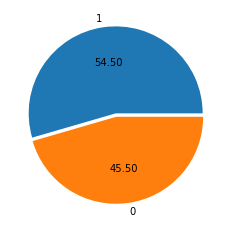

In [ ]:
plt.pie(bjp['Sentiment'].value_counts(), explode = [0.02,0.02], labels=['1','0'],autopct="%0.2f")
plt.show()

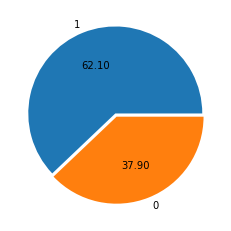

In [ ]:
congress['score'] = congress['congress'].apply(lambda review: vader.polarity_scores(review))
congress['compound']  = congress['score'].apply(lambda score_dict: score_dict['compound'])
congress['Sentiment'] = congress['compound'].apply(lambda c: 1 if c >=0 else 0)
plt.pie(congress['Sentiment'].value_counts(), explode = [0.02,0.02], labels=['1','0'],autopct="%0.2f")
plt.show()

# BJP

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=5000)

In [ ]:
x = cv.fit_transform(bjp['BJP']).toarray()
y = bjp['Sentiment'].values


print(x.shape)
print(y.shape)

(2000, 5000)
(2000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)

# **Model Building Using BOW**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

xgb = XGBClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier()
#lrc = LogisticRegression()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#xgb = XGBClassifier(n_estimators=50,random_state=2)
#svc = SVC(kernel='sigmoid', gamma=1.0)
#dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    print('Accuracy Score = ',accuracy_score(y_test,y_pred))
    print('precision Score = ',precision_score(y_test,y_pred))

SVM

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.62
precision Score =  0.6637554585152838


DecisionTreeClassifier

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7725
precision Score =  0.7857142857142857


LogisticRegression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.785
precision Score =  0.7722007722007722


GaussianNB

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.6925
precision Score =  0.7888888888888889



MultinomialNB

In [ ]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.77
precision Score =  0.7896995708154506


BernoulliNB

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.755
precision Score =  0.7380073800738007


XGBClassifier

In [ ]:
train_classifier(xgb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7425
precision Score =  0.7039473684210527


## **Predicting Output Using Best Model**

In [ ]:
y_pred = dtc.predict(x_train)
pred= pd.DataFrame({'Pred': y_pred})

In [ ]:
pred['Pred'].value_counts()

1    863
0    737
Name: Pred, dtype: int64

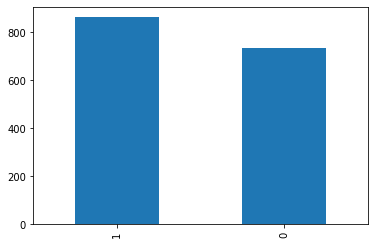

In [ ]:
pred['Pred'].value_counts().plot(kind= 'bar')

## **Model Building using TFIDF**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

x = tfidf.fit_transform(bjp['BJP']).toarray()
y = bjp['Sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)

SVM

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.76
precision Score =  0.7568627450980392


Decision tree

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7275
precision Score =  0.7478991596638656


Logistic Regression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7
precision Score =  0.6777408637873754


GussionNB

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.675
precision Score =  0.7389162561576355


MultinomialNB

In [ ]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.77
precision Score =  0.7710843373493976


BournoliNB

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.755
precision Score =  0.7380073800738007


XGBoost

In [ ]:
train_classifier(xgb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.725
precision Score =  0.6943521594684385


# **Congress**

Word to Num

In [ ]:
x = cv.fit_transform(congress['congress']).toarray()
y = congress['Sentiment'].values

print(x.shape)
print(y.shape)

(2000, 5000)
(2000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

## **Model Building using BOW**

SVM

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.6225
precision Score =  0.6594202898550725


Decision Tree

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.74
precision Score =  0.7509293680297398


Logistic regression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.705
precision Score =  0.6983606557377049


GussionNB

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.66
precision Score =  0.7464114832535885


MultinomialNB

In [ ]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.75
precision Score =  0.7860082304526749


BounoliNB

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7325
precision Score =  0.7185430463576159


XGBoost

In [ ]:
train_classifier(xgb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.695
precision Score =  0.6685878962536023


## **Model Building using TFIDF**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

x = tfidf.fit_transform(congress['congress']).toarray()
y = congress['Sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

SVM

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.745
precision Score =  0.7444794952681388


Decision tree

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.73
precision Score =  0.7811320754716982


Logistic Regression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7025
precision Score =  0.7005813953488372


GussionNB

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.665
precision Score =  0.759493670886076


MultinomialNB

In [ ]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.74
precision Score =  0.7256637168141593


BournoliNb

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7825
precision Score =  0.7796052631578947


XGBoost

In [ ]:
train_classifier(xgb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.715
precision Score =  0.7134328358208956


## **Predicting Output Using Best Model**

In [ ]:
y_pred2 = bnb.predict(x_train)
prediction = pd.DataFrame({'pred': y_pred2})
print(accuracy_score(y_train,y_pred2))
prediction['pred'].value_counts()

0.914375


1    1112
0     488
Name: pred, dtype: int64

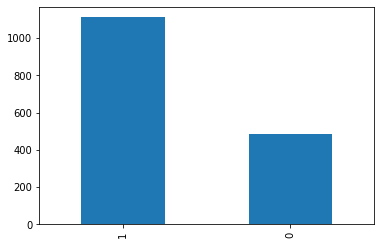

In [ ]:
 prediction['pred'].value_counts().plot(kind='bar')